      time  timeo  timeh  timel  total   ind    p    p1
28.5   0.0    0.0    0.0    1.0    1.0  28.5  0.0   0.0
29.0   5.0    3.0    0.0    7.0   15.0  29.0  0.5  14.0
29.5   6.0   10.0    7.0    7.0   30.0  29.5  0.5  15.0
30.0   7.0    4.0    9.0    6.0   26.0  30.0  0.5  -4.0
30.5   7.0    8.0    5.0    7.0   27.0  30.5  0.5   1.0
...    ...    ...    ...    ...    ...   ...  ...   ...
95.5   4.0    4.0    2.0    1.0   11.0  95.5  0.5  -4.0
96.0   4.0    2.0    6.0    3.0   15.0  96.0  0.5   4.0
96.5   5.0    4.0    2.0    1.0   12.0  96.5  0.5  -3.0
97.0   0.0    2.0    5.0    0.0    7.0  97.0  0.5  -5.0
97.5   0.0    0.0    2.0    0.0    2.0  97.5  0.5  -5.0

[139 rows x 8 columns]


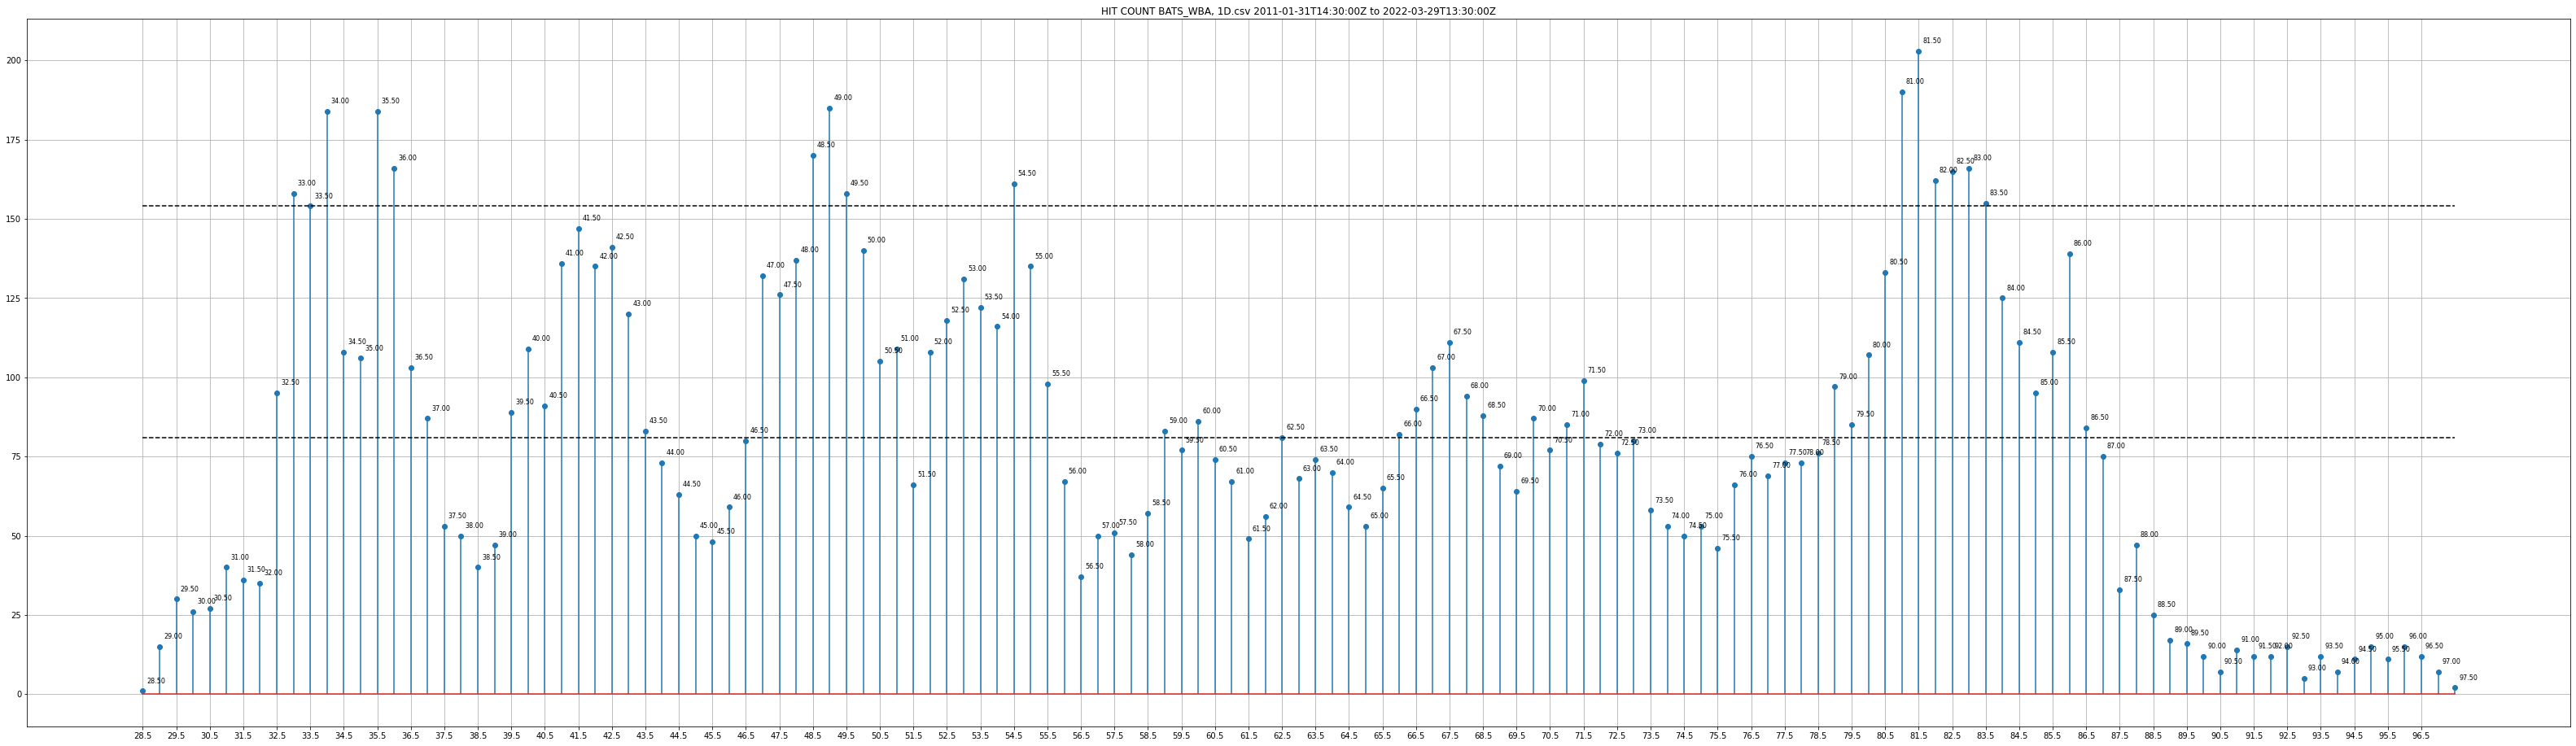

In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
from ta.momentum import StochRSIIndicator
from ta.momentum import RSIIndicator
from ta.volume import ForceIndexIndicator
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
base=0.5

csv_name='BATS_WBA, 1D.csv'
payload=pd.read_csv(csv_name)

payload['open']=base*round(payload.open/base)
payload['close']=base*round(payload.close/base)
payload['high']=base*round(payload.high/base)
payload['low']=base*round(payload.low/base)
dfc=pd.DataFrame(payload.groupby('close').count().sort_values(by='time',ascending=False).time)
dfo=pd.DataFrame(payload.groupby('open').count().sort_values(by='time',ascending=False).time)
dfh=pd.DataFrame(payload.groupby('high').count().sort_values(by='time',ascending=False).time)
dfl=pd.DataFrame(payload.groupby('low').count().sort_values(by='time',ascending=False).time)
dff=dfc.join(dfo,how='outer',rsuffix='o',sort=True)
dff=dff.join(dfh,how='outer',rsuffix='h',sort=True)
dff=dff.join(dfl,how='outer',rsuffix='l',sort=True).fillna(0)
dff['total']=dff.sum(axis=1)

#filter out levels that are hit least frequent
#dff=dff[dff.total>=np.percentile(dff.total,30)]

#filter out levels that are too close to each other
dff['ind']=dff.index
dff['p']=dff.ind.diff(periods=1).fillna(0)
dff['p1']=dff.total.diff(periods=1).fillna(0)
dff=dff[dff.p>=np.percentile(dff.p,0)]


#dff=dff.sort_values(by='total',ascending=False)
dff.to_csv('avaxeth-lvls.csv')
#print(np.percentile(dff.total,33))
#dfc=pd.DataFrame(payload.groupby('close').count())
#print(payload.head)
print(dff)
avg=(np.median(dff.total))

#print(dff[dff.total>0])
#print(dff[(dff.total>avg*1.5) & (dff.total< avg*3)])
#print(np.average(dff.total))
#print(np.median(dff.total))
#print(np.max(dff.total))
#print(dff[(dff.total>np.percentile(dff.total,15)) & (dff.total< np.percentile(dff.total,30))])



# We can set the number of bins with the *bins* keyword argument.
fig, ax = plt.subplots()
plt.stem(dff.ind,dff.total)
ax.grid()
fig.set_size_inches(56, 16)
ax.xaxis.set_ticks(np.arange(np.min(dff.ind),np.max(dff.ind),1))
#ax.yaxis.set_ticks(np.arange(0,np.max(dff.total)))

for x,y in zip(dff.ind,dff.total):

    label = "{:.2f}".format(x)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(5,10), # distance from text to points (x,y)
                 fontsize=8,
                 ha='left') # horizontal alignment can be left, right or center

ax.plot([np.min(dff.ind),np.max(dff.ind)],[np.mean(dff.total),np.mean(dff.total)],'--k')
ax.plot([np.min(dff.ind),np.max(dff.ind)],[np.percentile(dff.total,90),np.percentile(dff.total,90)],'--k')
title='HIT COUNT '+csv_name+" "+payload.time[0]+" to "+payload.time[len(payload.time)-1]
plt.title(title)
plt.savefig(title+'.png')    
plt.show()